In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ad = pd.read_csv('advertising.csv')
ad.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad.shape

(200, 4)

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


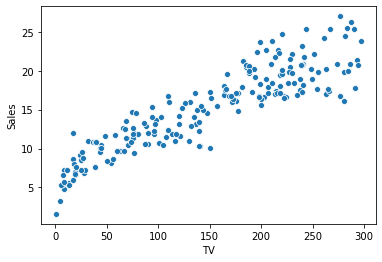

In [7]:
# Data Visualization 
sns.scatterplot(x=ad['TV'], y=ad['Sales'])

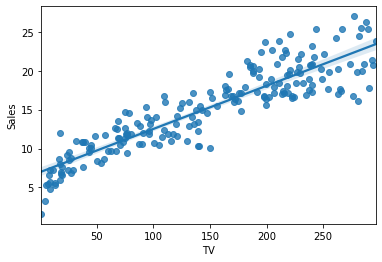

In [8]:
sns.regplot(x= ad['TV'], y=ad['Sales'])
plt.show()

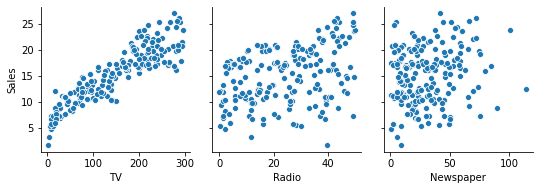

In [9]:
sns.pairplot(x_vars=['TV', 'Radio' , 'Newspaper'], y_vars=['Sales'], data = ad)
plt.show()

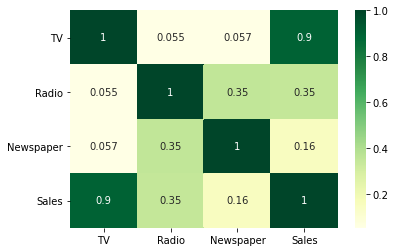

In [10]:
sns.heatmap(ad.corr(), annot = True, cmap ='YlGn')
plt.show()

In [11]:
# Performing simple linear regression 

import statsmodels 
import statsmodels.api as sm
import sklearn 

from sklearn.model_selection import train_test_split


In [12]:
X = ad['TV']
y = ad['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [14]:
# using statsmodel api find bestfit 

X_train_sm = sm.add_constant(X_train)

In [15]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.52e-52
Time:                        17:53:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

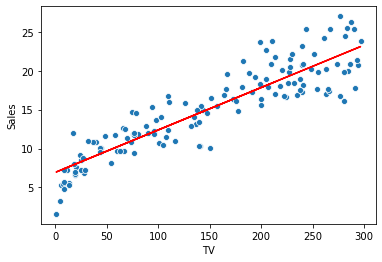

In [17]:
# Plot the predictions 
sns.scatterplot(X_train, y_train)
plt.plot(X_train,6.9487 + 0.0545*X_train, 'r' )
plt.show()

In [18]:
## Residual Analysis 
y_tran_pred = lr_model.predict(X_train_sm)

In [19]:
y_tran_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [20]:
res = y_train - y_tran_pred

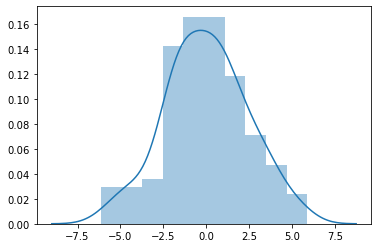

In [21]:
sns.distplot(res)

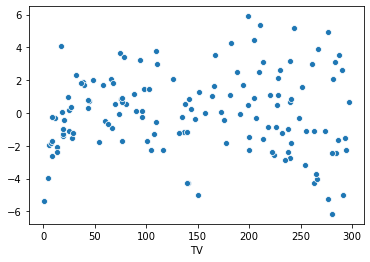

In [22]:
sns.scatterplot(X_train, res)

In [23]:
# Prediction and Evaluating model on test set 

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

In [25]:

r2 = r2_score(y_train, y_tran_pred)
r2

0.8157933136480389

In [26]:
help( sklearn.metrics.mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
    Mean squared error regression loss
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']                 or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_av

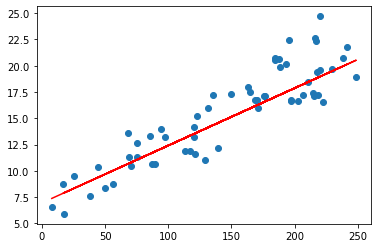

In [27]:
# Plot the prediction model on test set 

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [40]:
print(help(sklearn.model_selection.train_test_split))

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [41]:
### Linear Regression using sklearn 

X_train_lm,X_test_lm, y_train_lm,y_test_lm = train_test_split(X, y, train_size =0.7, test_size =0.3, random_state=100)

In [42]:
X_train_lm.shape

(140,)

In [43]:
y_test_lm.shape

(60,)

In [44]:
y_train_lm.shape

(140,)

In [45]:
X_test_lm.shape

(60,)

In [46]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [47]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [48]:
lm.coef_

array([0.05454575])

In [49]:
lm.intercept_

6.948683200001357

In [52]:
y_train_pred_lm = lm.predict(X_train_lm ) 
y_test_pred_lm = lm.predict(X_test_lm)

In [53]:
print(r2_score(y_train_lm, y_train_pred_lm))
print(r2_score(y_test_lm, y_test_pred_lm))

0.8157933136480389
0.7921031601245662
